## Bisection method

The bisection  method is a root-finding method that applies to any continuous function for which one knows two values with opposite signs [1]. While the method is simple, it comes with some disadvantages - slow convergence, requires bracketing, not suitable for multiple roots, limited precision, and requires evaluation of the function in question. Here, we will go through some examples to demonstrate the functionality and weaknesses of the bisection method.

[1] https://en.wikipedia.org/wiki/Bisection_method

### Example 1 - Warming up

Let's start of with an easy example:

Find the root of $y=(0.5x)^3-2$.

In [1]:
import numpy as np
import bisection as bs
from typing import Union

def my_function(x:Union[int,float])->Union[int,float]:
    return (0.5*x)**3 - 2

a_guess = -2
b_guess = 4
ans=bs.bisection_method(my_function,a_guess,b_guess)
print(f'found answer = {np.round(ans,4)}')
print(f'known answer = {2.5198}')

found answer = 2.5198
known answer = 2.5198


### Example 2 - Are you good at guessing?

Example 1 provides a function with 1 root. What happen when we're trying to solve a function with multiple roots?

Find the root of $y=(0.2x)^2-1$.

In [2]:
import numpy as np
import bisection as bs
from typing import Union

def my_function(x:Union[int,float])->Union[int,float]:
    return (0.2*x)**2-1

a_guess = -6
b_guess = 1
ans=bs.bisection_method(my_function,a_guess,b_guess)
print('initial guess 1 --------------------------')
print(f'initial guess a={a_guess} and b={b_guess}')
print(f'found answer = {np.round(ans,4)}')
print(f'known answers = ({-5.0},{5.0})')

a_guess2 = 0
b_guess2 = 5
ans=bs.bisection_method(my_function,a_guess2,b_guess2)
print('\ninitial guess 2 --------------------------')
print(f'initial guess a={a_guess2} and b={b_guess2}')
print(f'found answer = {np.round(ans,4)}')
print(f'known answers = ({-5.0},{5.0})')
print('\n As you can see, the bisection method is very sensitive to the initial guess.')

initial guess 1 --------------------------
initial guess a=-6 and b=1
found answer = -5.0
known answers = (-5.0,5.0)

initial guess 2 --------------------------
initial guess a=0 and b=5
found answer = 5.0
known answers = (-5.0,5.0)

 As you can see, the bisection method is very sensitive to the initial guess.


### Example 3 - Limited precision

Can you guess what's happening in this example? (The first code block is supposed to fail)

Find the root of $y=(0.1x)^5-0.5x-2$.

In [3]:
import numpy as np
import bisection as bs
from typing import Union

def my_function(x:Union[int,float])->Union[int,float]:
    return (0.1*x)**5-0.5*x-2

a_guess = 15
b_guess = 16
ans=bs.bisection_method(my_function,a_guess,b_guess)

Exception: Bisection method cannot find a root within tolerance after 1000 iterations.

Here, the bisection method cannot find a solution after iterating 1000 times. We can either (i) lower the tolerance, (ii) increase the number of iterations, or (iii) select a different solver. We can first lower the tolerance since we don't have to be super precised in this problem.

In [4]:
a_guess = 15
b_guess = 16
ans=bs.bisection_method(my_function,a_guess,b_guess,tol=1e-8)
print(f'found answer = {np.round(ans,2)}')
print(f'known answers = {15.82}')

found answer = 15.82
known answers = 15.82


### Example 4 - Vroom vroom

Stacy is at a stoplight in her mom's car. As the light turns green, Stacy accelerates at a rate of $5.50m/s^2$ before having to hard break after traveling $15m$ due to a deer running by. Assuming that Stacy has not reached top speed during the duration, how long did it take for Stacy to travel the distance before stopping?

Ans: We can use the simple kinematic equation $\Delta x=v_it+\frac{1}{2}at^2$

In [5]:
import numpy as np
import bisection as bs
from typing import Union

def my_function(x:Union[int,float])->Union[int,float]:
    return 0.5*3.50*x**2-15

a_guess = 0
b_guess = 5
ans=bs.bisection_method(my_function,a_guess,b_guess)
print(f'found answer = {np.round(ans,4)}')
print(f'known answers = {2.9277}')

found answer = 2.9277
known answers = 2.9277


### Example 5 - Oscillation

A mass $m$ is attached to the end of a spring with $k=1$ that follows Hooke's law. When pulled, the mass takes $5s$ to travel up and down. Assuming negligible friction and constant amplitude of oscillation, what is the mass $m$?

Ans: $f=\frac{1}{T}=\frac{1}{2\pi}\sqrt{\frac{k}{m}}\Rightarrow \frac{1}{5}=\frac{1}{2\pi}\sqrt{\frac{1}{m}}$

In [6]:
import numpy as np
import bisection as bs
from typing import Union

def my_function(x:Union[int,float])->Union[int,float]:
    return 5/(2*np.pi)*np.sqrt(1/x)-1

a_guess = 0.1
b_guess = 5
ans=bs.bisection_method(my_function,a_guess,b_guess)
print(f'found answer = {np.round(ans,4)}')
print(f'known answers = {0.6333}')

found answer = 0.6333
known answers = 0.6333


## Newton-Raphson Method

In numerical analysis, the Newton–Raphson method, also known simply as Newton's method, named after Isaac Newton and Joseph Raphson, is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function [2]. The most basic version starts with a real-valued function f, its derivative f′, and an initial guess x0 for a root of f. If f satisfies certain assumptions and the initial guess is close, then 

$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

is a better approximation of the root than x0. The process is repeated until a sufficiently precise value is reached.

[2] https://en.wikipedia.org/wiki/Newton's_method

### Example 1 - Warm-up

To get started, solve the following equation: $0=(x-3)^3$.

In [ ]:
import newton as nt
from typing import Union

def func_to_solve(x:Union[float,int])->Union[float,int]:
    return (x-3)**3
def func_derivative(x:Union[float,int])->Union[float,int]:
    return 3*(x-3)**2

x_guess = 5
ans = nt.newton_1D(func_to_solve,func_derivative,x_guess)
print(ans)

3.000004635640045


### Example 2 - System of equations

We've just solved  a single equation using Newton-Raphson. However, the method has more potential than that. Let's try to solve this system of equations:

$x^2-4x+5-y=0$$

$e^x-y=0$

In [ ]:
import newton as nt

def functions(x:np.ndarray)->np.ndarray:
    return np.array([
        x[0]**2-4*x[0]+5-x[1],
        np.exp(x[0])-x[1]
    ])

def jac(x:np.ndarray)->np.ndarray:
    return np.array([
        [2*x[0]-4,-1],
        [np.exp(x[0]),-1]
    ])

x_guess=[0,0]

ans = nt.newton_raphson(functions,jac,x_guess)
print(ans)

[0.84630378 2.33101497]


### Example 3 - Floating Ball

A floating ball has a specific gravity of 0.6 and has a radius of 5.5 cm.  You are asked to find the depth to which the ball is submerged when floating in water. The equation that gives the depth $x$ in meters to which the ball is submerged under water is given by 

$x^3-0.165x^2+3.993*10^{-4}=0$

Something to think about: Why is the initial guess x_guess=0 bad?

In [3]:
import newton as nt
from typing import Union

def funcs(x:Union[float,int])->Union[float,int]:
    return x**3 - 0.165*x**2 + 3.993e-4
def f_derivative(x:Union[float,int])->Union[float,int]:
    return 3*x**2 - 0.33*x

x_guess=0.05

ans = nt.newton_raphson(funcs,f_derivative,x_guess)
print(ans)

0.06242222222222221


### Example 4 - Oscillation

A mass $m$ is attached to the end of a spring with $k=1$ that follows Hooke's law. When pulled, the mass takes $5s$ to travel up and down. Assuming negligible friction and constant amplitude of oscillation, what is the mass $m$?

Ans: $f=\frac{1}{T}=\frac{1}{2\pi}\sqrt{\frac{k}{m}}\Rightarrow \frac{1}{5}=\frac{1}{2\pi}\sqrt{\frac{1}{m}}$

In [6]:
import numpy as np
import newton as nt
from typing import Union

def funcs(x:Union[int,float])->Union[int,float]:
    return 5/(2*np.pi)*np.sqrt(1/x)-1

def f_derivative(x:Union[float,int])->Union[float,int]:
    return -5 / (4*np.pi*np.power(x,3/2))

x_guess=0.5

ans = nt.newton_raphson(funcs,f_derivative,x_guess)
print(ans)

0.611423412368327


### Example 5 - Another set of equations

Solve the system of equations, there might be more than 1 root.

$x-y+1=0$

$x^2+1-y=0$

In [15]:
import newton as nt

def functions(x:np.ndarray)->np.ndarray:
    return np.array([
        x[0]-x[1]+1,
        x[0]**2+1-x[1]
    ])

def jac(x:np.ndarray)->np.ndarray:
    return np.array([
        [1,-1],
        [2*x[0],-1]
    ])

x_guess=[0,0]
ans = nt.newton_raphson(functions,jac,x_guess)
print(ans)

print('There is another answer:')
x_guess=[2,3]
ans = nt.newton_raphson(functions,jac,x_guess)
print(ans)

[0. 1.]
There is another answer:
[1. 2.]


## Elastoplastic

When you deform any plastic material, then unload it, and then try to re-load past it’s previously reached maximum stress, so as to induce further plastic flow, its resistance to plastic flow will have increased i.e. its yield point/elastic limit increases (meaning plastic flow begins at a higher stress than in the preceding cycle- so we say the resistance to plastic flow increases) [3]. This is known as 'strain hardening'. Here, we will discuss two types of hardening - isotropic and kinematic hardening.

Isotropic Hardening - For isotropic hardening, the yield surface is symmetric about the stress axes, which means the yield strength in tension and compression are the same. In other terms, isotropic hardening does not account for the Bauschinger effect.

Kinematic hardening - However, this is not true for most materials in reality. Usually, an increase in tensile yield strength occurs at the expense of compressive yield strength. This is what is the bauschinger effect and kinematic hardening is one that accounts for the bauschinger effect. In bauschinger effect, plastic deformation in one direction affects the response in the other direction (that is, yield strength in one direction increases at the cost of the reduction in yield strength in the opposite direction). If you construct a yield surface joining the tensile and the compressive yield points, then if the tensile cycle precedes the compressive cycle, then, the tensile yield point would go on increasing and the compression yield point would go on decreasing. This results in a case where the yield surface is constantly changing in space but is still of the same size.

[3] https://www.quora.com/What-is-the-difference-between-isotropic-and-kinematic-hardening

### Example 1 - Let's try to replicate the Isotropic Hardening example in class

Plot the behavior of an isotropic hardening material with the given load increments and material behavior:

$E=1000$
$~~E_t=100$
$~~Y_0=10$

$\sigma_n=0$
$~~\epsilon_p^n=0$

In [1]:
import elastoplastic as ep
import numpy as np

E=1000
E_t=100
Y0=10
sigma_n=0
epsilon_p_n=0
H=(E*E_t)/(E-E_t)

strain_1 = np.linspace(0,0.05,1000)
strain_2 = np.linspace(0.05,-0.05,2000)
strain_3 = np.linspace(-0.05,0.075,2500)
strain_4 = np.linspace(0.075,-0.025,2000)
strain_list=np.concatenate((strain_1,strain_2,strain_3,strain_4),axis=0)

iso_mat = ep.IsotropicHardening(E=E,H=H,Y0=Y0)
stress_list = iso_mat.start_experiment(strain_list)

In [ ]:
import matplotlib.pyplot as plt
steps_arr = np.linspace(0,len(strain_list)-1,len(strain_list),dtype=int)
fig,ax = plt.subplots(figsize=(6,4))
ax.plot(steps_arr,strain_list)
ax.set_xlabel('step')
ax.set_ylabel('total strain')
ax.set_title('loading increments')

Text(0.5, 1.0, 'isotropic hardening behavior')

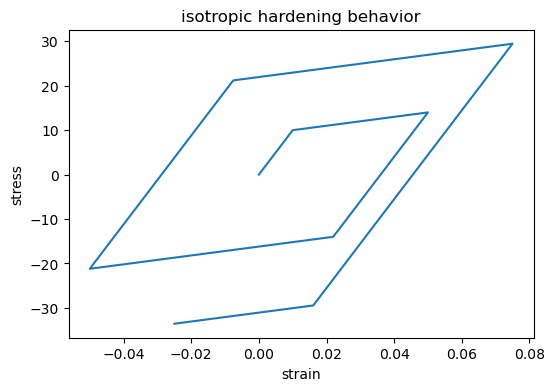

In [2]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))

ax.plot(strain_list,stress_list)
ax.set_xlabel('strain')
ax.set_ylabel('stress')
ax.set_title('isotropic hardening behavior')

### Example 2 - now we recreate the Kinematic Hardening example

Similar to Example 1, now we will try the same load increments on a kinematic hardening material with the given properties:

$E=1000$
$~~E_t=100$
$~~Y_0=10$

$\sigma_n=0$
$~~\epsilon_p^n=0$
$~~\alpha^n=0$

In [3]:
import elastoplastic as ep
import numpy as np

E=1000
E_t=100
Y0=10
sigma_n=0
epsilon_p_n=0
H=(E*E_t)/(E-E_t)

strain_1 = np.linspace(0,0.05,1000)
strain_2 = np.linspace(0.05,-0.05,2000)
strain_3 = np.linspace(-0.05,0.075,2500)
strain_4 = np.linspace(0.075,-0.025,2000)
strain_list=np.concatenate((strain_1,strain_2,strain_3,strain_4),axis=0)

iso_mat = ep.KinematicHardening(E=E,H=H,Y0=Y0)
stress_list = iso_mat.start_experiment(strain_list)

Text(0.5, 1.0, 'kinematic hardening behavior')

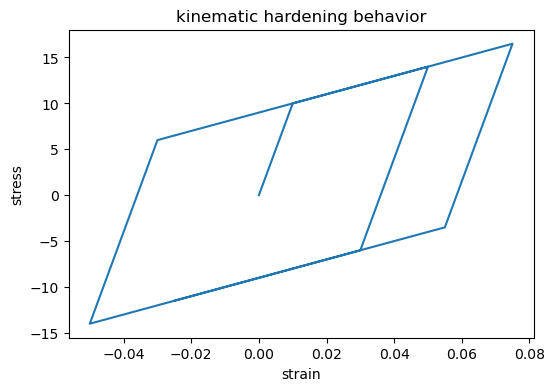

In [4]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))

ax.plot(strain_list,stress_list)
ax.set_xlabel('strain')
ax.set_ylabel('stress')
ax.set_title('kinematic hardening behavior')

### Example 3 - Single Truss Element - Monotonic Loading

A single truss element is pin supported at one end and is roller supported at the other end. The resulting truss element is monotonically loaded in tension along its axis in the direction of its only free displacement degree of freedom. The example element has $L=60~in$, $A=1.0~in^2$, and $E=29e3~ksi$. The yield stress is taken as $\sigma_y=36~ksi$, and plastic modulus $H=500~ksi$. Plot the stress-strain curve of the truss element behavior for displacement up to 0.05in. [4]

[4] https://imechanica.org/node/11811

In [6]:
import elastoplastic as ep
import numpy as np

E=29e3
H=500
Y0=36
sigma_n=0
epsilon_p_n=0

max_disp = 0.5
max_strain = (60+0.5)/60 - 1
print(f'an element with L=60in and displacement of 0.5in will have a max strain of {max_strain}')
strain_list=np.linspace(0,max_strain,2000)

iso_mat = ep.IsotropicHardening(E=E,H=H,Y0=Y0)
stress_list = iso_mat.start_experiment(strain_list)

an element with L=60in and displacement of 0.5in will have a max strain of 0.008333333333333304


Text(0.5, 1.0, 'isotropic hardening behavior')

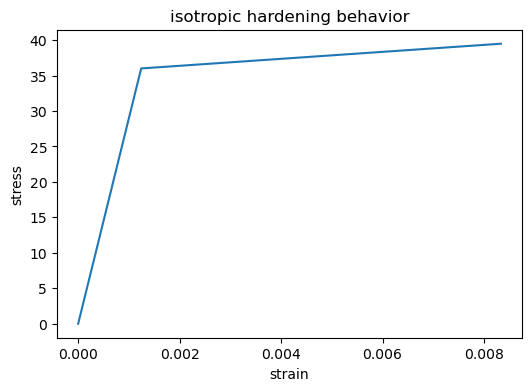

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))

ax.plot(strain_list,stress_list)
ax.set_xlabel('strain')
ax.set_ylabel('stress')
ax.set_title('isotropic hardening behavior')

### Example 4 - Single Truss Element - Cyclic Loading

The same truss element in Example 3 is being used again. Let's load the element cyclicly and see the behavior

In [7]:
import elastoplastic as ep
import numpy as np

E=29e3
H=500
Y0=36
sigma_n=0
epsilon_p_n=0

strain_1 = np.linspace(0,0.05,1000)
strain_2 = np.linspace(0.05,-0.05,2000)
strain_3 = np.linspace(-0.05,0.075,2500)
strain_4 = np.linspace(0.075,-0.025,2000)
strain_list=np.concatenate((strain_1,strain_2,strain_3,strain_4),axis=0)

iso_mat = ep.IsotropicHardening(E=E,H=H,Y0=Y0)
stress_list = iso_mat.start_experiment(strain_list)

Text(0.5, 1.0, 'isotropic hardening behavior')

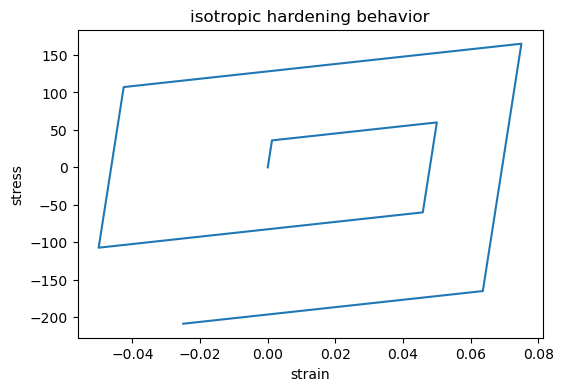

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))

ax.plot(strain_list,stress_list)
ax.set_xlabel('strain')
ax.set_ylabel('stress')
ax.set_title('isotropic hardening behavior')

### Example 5 - Single Truss element - Kinematic hardening - cyclic loading

The same truss element in Example 3 is being used again, but this time the material has a kinematic hardening behavior. Let's load the element cyclicly and see the behavior.

In [9]:
import elastoplastic as ep
import numpy as np

E=29e3
H=500
Y0=36
sigma_n=0
epsilon_p_n=0

strain_1 = np.linspace(0,0.05,1000)
strain_2 = np.linspace(0.05,-0.05,2000)
strain_3 = np.linspace(-0.05,0.075,2500)
strain_4 = np.linspace(0.075,-0.025,2000)
strain_list=np.concatenate((strain_1,strain_2,strain_3,strain_4),axis=0)

iso_mat = ep.KinematicHardening(E=E,H=H,Y0=Y0)
stress_list = iso_mat.start_experiment(strain_list)

Text(0.5, 1.0, 'isotropic hardening behavior')

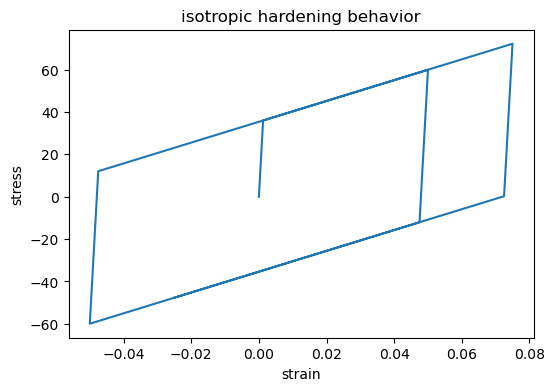

In [10]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))

ax.plot(strain_list,stress_list)
ax.set_xlabel('strain')
ax.set_ylabel('stress')
ax.set_title('isotropic hardening behavior')